In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os 
import pathlib
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
data_dir = pathlib.Path("Datasets/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

Shape (512, 512, 3)
0 255


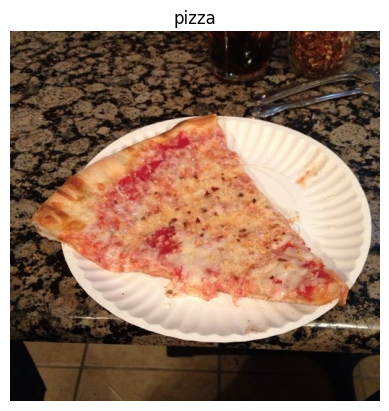

In [10]:
import random


def view_random_images(target_dir, target_class):
    target_folder = target_dir + "/" + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img, cmap='viridis', vmin=0, vmax=255)
    plt.title(target_class)
    plt.axis("off")
    print("Shape", img.shape)
    print(img.min(), img.max())
view_random_images("Datasets/pizza_steak/train", "pizza")

In [11]:
tf.random.set_seed(69)

train_data_gen = ImageDataGenerator(rescale=1./ 255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_path = "Datasets/pizza_steak/train/"
test_path = "Datasets/pizza_steak/test/"



In [12]:
train_data = train_data_gen.flow_from_directory(train_path,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_path,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 3s 54ms/step - loss: 0.5842 - accuracy: 0.6800 - val_loss: 0.4215 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 2s 53ms/step - loss: 0.4262 - accuracy: 0.8193 - val_loss: 0.3298 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 2s 51ms/step - loss: 0.4315 - accuracy: 0.7967 - val_loss: 0.3740 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 2s 49ms/step - loss: 0.3896 - accuracy: 0.8393 - val_loss: 0.3306 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 3s 53ms/step - loss: 0.3458 - accuracy: 0.8587 - val_loss: 0.3303 - val_accuracy: 0.8600
